In [14]:
import pandas as pd
import math
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/data-ny.csv", sep = ',', header=None, names =  ['userid', 'venueid', 'venuecatid', 'venuecatname','latitude','longitude','timezone','utctime'])
category = "Coffee Shop"
venueid = '4ab966c3f964a5203c7f20e3'
user = 642
time = 16
user_rows = df.loc[df['userid'] == user]
print(user_rows.head())

      userid                   venueid                venuecatid  \
6        642  4ab966c3f964a5203c7f20e3  4bf58dd8d48988d1e0931735   
26       642  4d9a2f78d97ba1430b43336b  4bf58dd8d48988d130941735   
3912     642  4a4ff7a8f964a520ddaf1fe3  4bf58dd8d48988d163941735   
4224     642  4bdf41600ee3a593bc8233b0  4bf58dd8d48988d164941735   
4485     642  4b4cd551f964a520c8c026e3  4bf58dd8d48988d1f6941735   

          venuecatname   latitude  longitude  timezone  \
6          Coffee Shop  40.751591 -73.974121      -240   
26            Building  40.752307 -73.971854      -240   
3912              Park  40.647792 -74.003735      -240   
4224             Plaza  40.632220 -73.947299      -240   
4485  Department Store  40.631544 -73.946874      -240   

                             utctime  
6     Tue Apr 03 18:04:38 +0000 2012  
26    Tue Apr 03 18:14:21 +0000 2012  
3912  Sat Apr 07 19:40:16 +0000 2012  
4224  Sat Apr 07 22:02:45 +0000 2012  
4485  Sun Apr 08 00:15:00 +0000 2012  


In [175]:
from sklearn.cluster import DBSCAN
data = user_rows[['latitude', 'longitude']]
train_data = data[:299]
test_data = data[:299]
db = DBSCAN(eps = 0.01, min_samples = 35, metric = 'euclidean').fit(train_data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
print(labels)
db.fit_predict(test_data)

[ 0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1  2  0  0  0  1  0  0
  0  2  2  0  0 -1 -1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0
  0  2  2  2  2  1  1  0  0  0  0  0  0 -1 -1  1  1  2  1  0  0  1  0  0
  1  1  1  2  1  0  0 -1  1  0 -1  1  1  1  1  2  2 -1 -1  0 -1  0  2  0
  0  0  2  1  2  2  0 -1  1  1  1  0  0  0  0  0 -1  1  2  2  1  1 -1  1
  1  0  0  0  2  1  0 -1 -1  0  1  1  1  2  2  1  0 -1  1  1  2  2  2  1
  2  2  2  0  0  0 -1  0  0  0  1  1 -1  0  0  0  2  1  0  0  0  0  0  1
  1  1  2 -1  0  0  0  2  0  0  0  0  0  0  1  1  0  1  0  0  0  0  2  2
 -1  0  0  0  2  2 -1  0  0  0  0 -1 -1 -1  0  0  2  0 -1  2  0  0  1 -1
  1  0  0  2 -1  2 -1 -1 -1  2  1  1 -1  2  2 -1  2 -1 -1 -1 -1 -1 -1  2
 -1  1 -1 -1 -1  1  2  2  2  2 -1  2 -1  1  1 -1  2  2  2  1  1  2 -1 -1
  2 -1 -1  2 -1  2  1 -1 -1  2 -1 -1  1 -1 -1 -1 -1 -1 -1  2  2  1  2 -1
 -1 -1 -1  0  1  2 -1 -1 -1 -1  2]


array([ 0,  0, -1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        2,  0,  0,  0,  1,  0,  0,  0,  2,  2,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  2,  2,
        2,  2,  1,  1,  0,  0,  0,  0,  0,  0, -1, -1,  1,  1,  2,  1,  0,
        0,  1,  0,  0,  1,  1,  1,  2,  1,  0,  0, -1,  1,  0, -1,  1,  1,
        1,  1,  2,  2, -1, -1,  0, -1,  0,  2,  0,  0,  0,  2,  1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  0,  0,  0, -1,  1,  2,  2,  1,  1, -1,
        1,  1,  0,  0,  0,  2,  1,  0, -1, -1,  0,  1,  1,  1,  2,  2,  1,
        0, -1,  1,  1,  2,  2,  2,  1,  2,  2,  2,  0,  0,  0, -1,  0,  0,
        0,  1,  1, -1,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        2, -1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  0,  2,  2, -1,  0,  0,  0,  2,  2, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  2,  0, -1,  2,  0,  0,  1, -1,  1,  0,  0,  2, -1,
        2, -1, -1, -1,  2

In [159]:
# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# plt.figure(2)
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         col = [0, 0, 0, 1]
#     class_member_mask = (labels == k)
#     xy = user_rows[class_member_mask & core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
#     xy = user_rows[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

# plt.show()

In [160]:
len(data)

299

In [161]:
labels

array([ 0,  0, -1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        2,  0,  0,  0,  1,  0,  0,  0,  2,  2,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  2,  2,
        2,  2,  1,  1,  0,  0,  0,  0,  0,  0, -1, -1,  1,  1,  2,  1,  0,
        0,  1,  0,  0,  1,  1,  1,  2,  1,  0,  0, -1,  1,  0, -1,  1,  1,
        1,  1,  2,  2, -1, -1,  0, -1,  0,  2,  0,  0,  0,  2,  1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  0,  0,  0, -1,  1,  2,  2,  1,  1, -1,
        1,  1,  0,  0,  0,  2,  1,  0, -1, -1,  0,  1,  1,  1,  2,  2,  1,
        0, -1,  1,  1,  2,  2,  2,  1,  2,  2,  2,  0,  0,  0, -1,  0,  0,
        0,  1,  1, -1,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        2, -1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  0,  2,  2, -1,  0,  0,  0,  2,  2, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  2,  0, -1,  2,  0,  0,  1, -1,  1,  0,  0,  2, -1,
        2, -1, -1, -1,  2

In [162]:
len(labels)

299

In [163]:
new_data = data
new_data.is_copy = False
new_data['labels'] = labels
new_data

,latitude,longitude,labels
6,40.751591,-73.974121,0
26,40.752307,-73.971854,0
3912,40.647792,-74.003735,-1
4224,40.632220,-73.947299,1
4485,40.631544,-73.946874,1
7584,40.598965,-73.937602,-1
7641,40.600223,-73.942144,-1
8630,40.741740,-73.993650,-1
8761,40.736828,-73.990645,-1
9630,40.752307,-73.971854,0


In [164]:
new_data = new_data.loc[new_data['labels'] != -1]
len(new_data)
print(new_data)

         latitude  longitude  labels
6       40.751591 -73.974121       0
26      40.752307 -73.971854       0
4224    40.632220 -73.947299       1
4485    40.631544 -73.946874       1
9630    40.752307 -73.971854       0
10042   40.752308 -73.973404       0
10055   40.752307 -73.971854       0
10232   40.752020 -73.971395       0
10265   40.752307 -73.971854       0
11509   40.752307 -73.971854       0
11528   40.752020 -73.971395       0
12388   40.672855 -73.983155       2
13431   40.752020 -73.971395       0
13454   40.752307 -73.971854       0
13817   40.752292 -73.971907       0
14539   40.632220 -73.947299       1
15565   40.752307 -73.971854       0
15735   40.752020 -73.971395       0
15743   40.752307 -73.971854       0
18385   40.672483 -73.976851       2
18400   40.673747 -73.975975       2
19370   40.752307 -73.971854       0
19635   40.750927 -73.971484       0
20592   40.752020 -73.971395       0
20631   40.752307 -73.971854       0
20893   40.752308 -73.973404       0
2

0.0033924554530163297


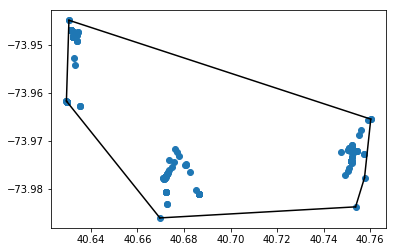

In [165]:
location = np.array(new_data[['latitude', 'longitude']])
hull = ConvexHull(location)
print(hull.volume)
#import matplotlib.pyplot as plt
plt.plot(location[:,0], location[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(location[simplex, 0], location[simplex, 1], 'k-')
plt.show()